 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df = whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"], infer_datetime_format=True))
whale_returns_df = whale_returns_df.drop(columns=["Date"])
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df = algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"], infer_datetime_format=True))
algo_returns_df = algo_returns_df.drop(columns=["Date"])
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df = sp500_history_df.set_index(pd.to_datetime(sp500_history_df["Date"], infer_datetime_format=True))
sp500_history_df = sp500_history_df.drop(columns=["Date"])
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].pct_change()
sp500_history_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_history_df = sp500_history_df.dropna().copy()
sp500_history_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_history_df = sp500_history_df.rename(columns={
    "Close":"S&P 500"
})
sp500_history_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df,algo_returns_df,sp500_history_df], axis="columns",join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

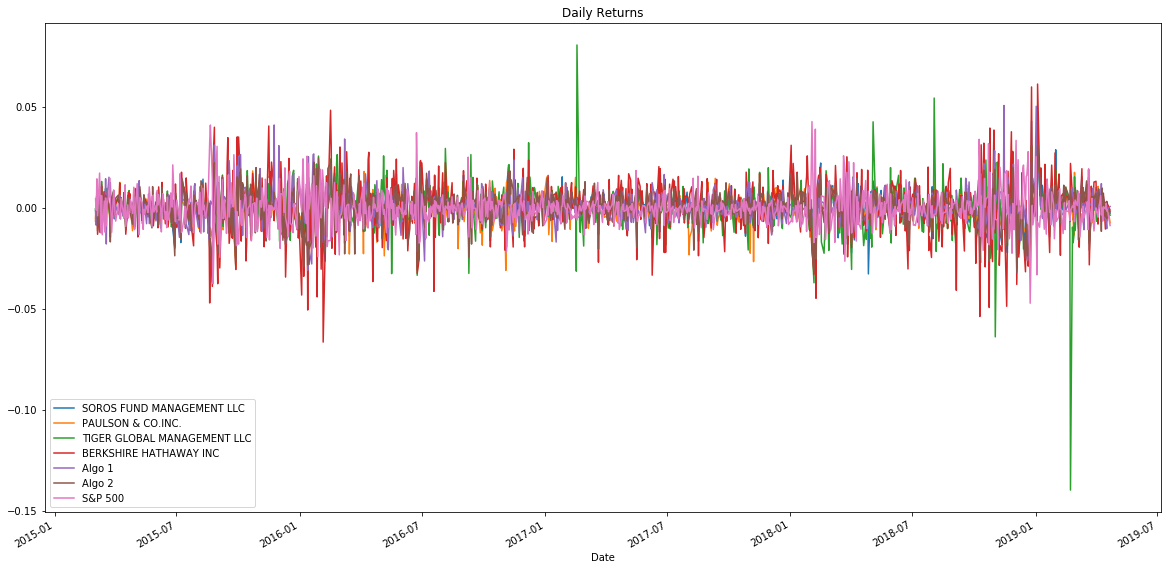

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10), title="Daily Returns")

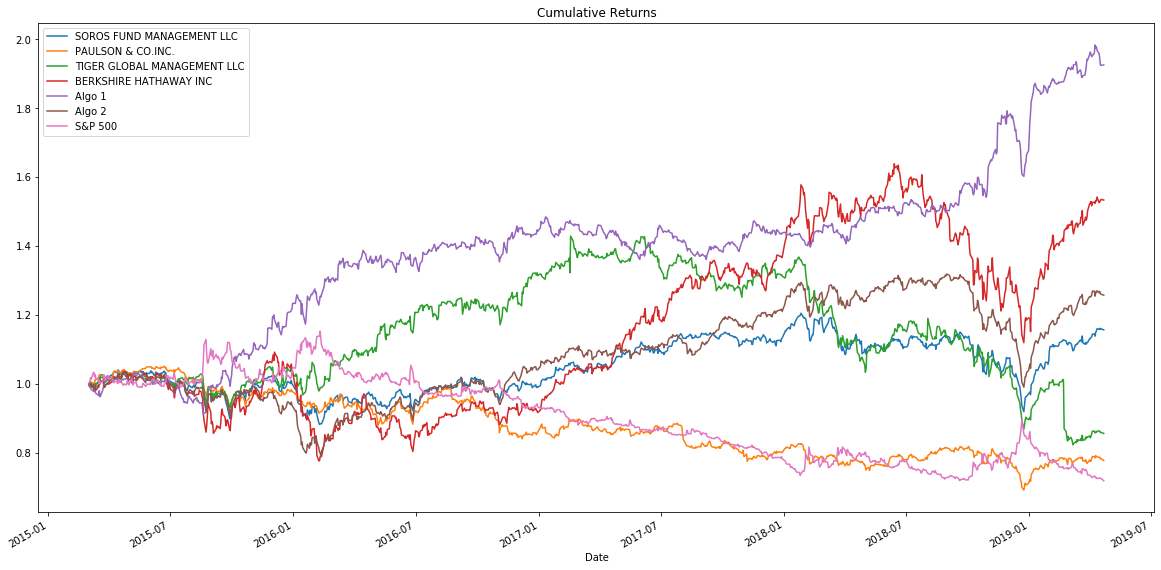

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

### <span style="color:red">It looks like all but Paulson & Co Inc. beat the S&P 500<span>

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

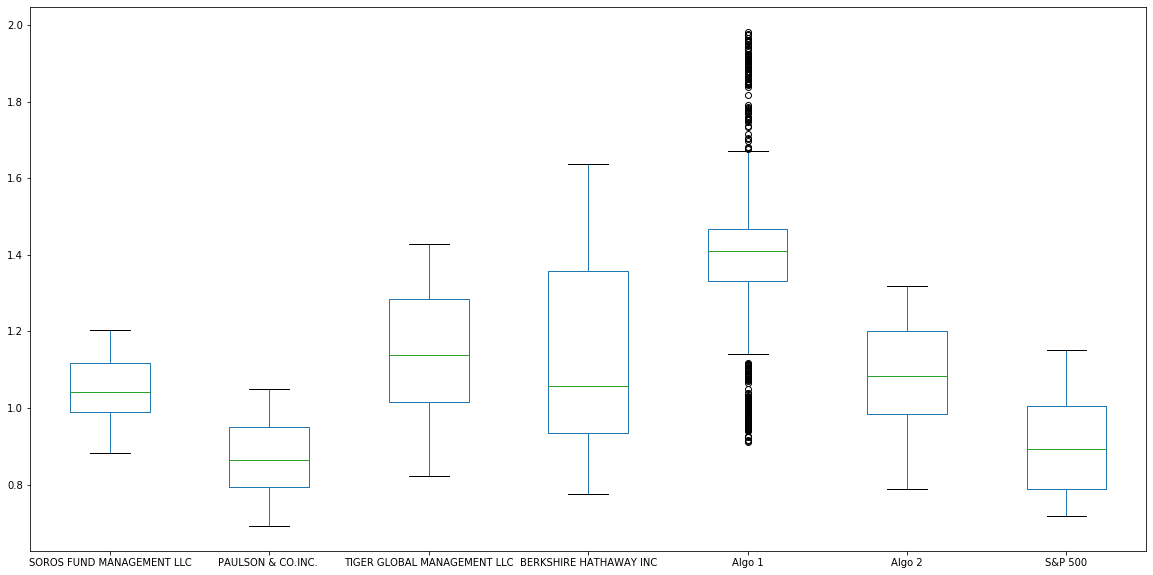

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_returns.plot.box(figsize=(20,10))

### <span style="color:red">The portfolio with the largest spread is Berkshire Hathaway and the portfolio with the smallest spread is Paulson & Co inc. </span>

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std_df= combined_df.std()
combined_std_df

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### <span style="color:red">Tiger Global Management Inc and Berkshire Hathaway are riskier than S&P 500 </span>

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_df.std() > combined_df["S&P 500"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = combined_std_df * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

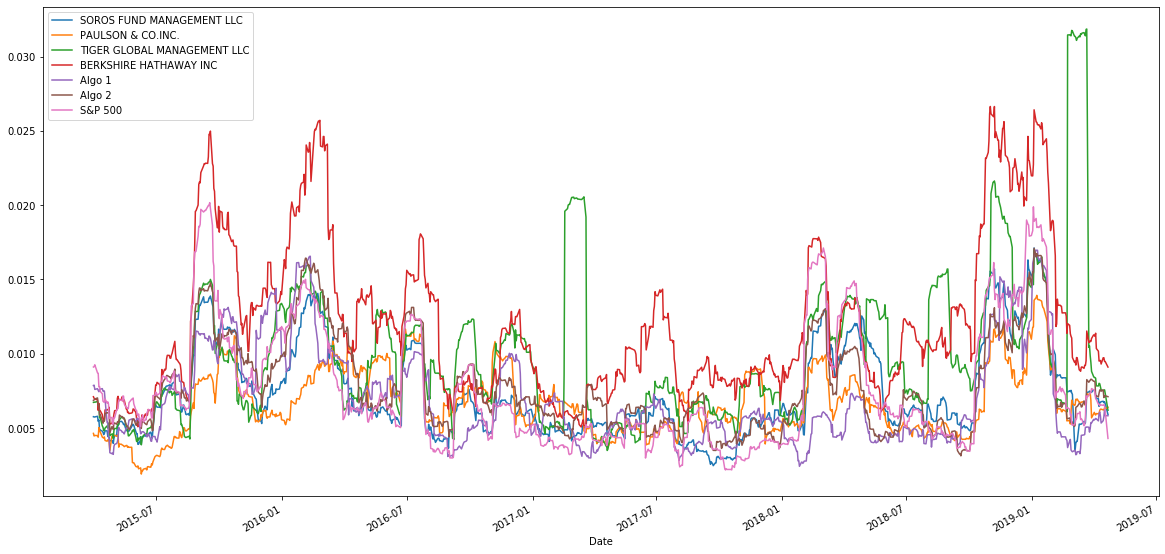

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### <span style="color:red">For the most part all the peaks and troughs follow each other however Tiger Global has had major peaks when the rest of the portfolios are going down.</span>

In [22]:
# Construct a correlation table
# YOUR CODE HERE
correlation_matrix = combined_df.corr()
correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### <span style="color:red">Paulson & Co.INC. has the closest correlation to S&P 500</span>

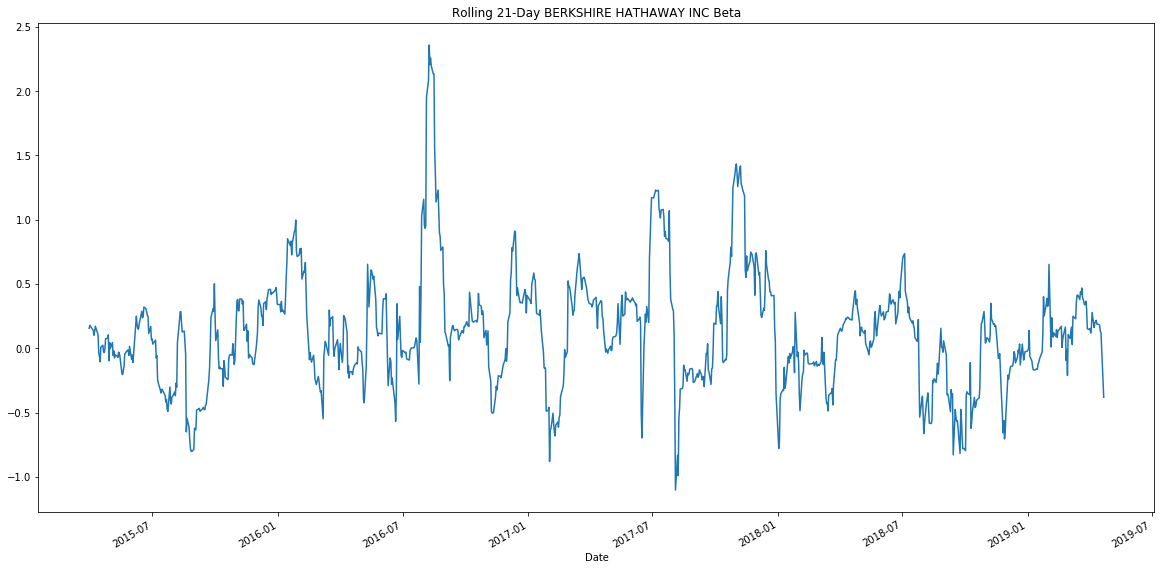

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day BERKSHIRE HATHAWAY INC Beta')

### <span style="color:red"> Berkshire Hathaway does see to be sensitive to the S&P 500 </span>

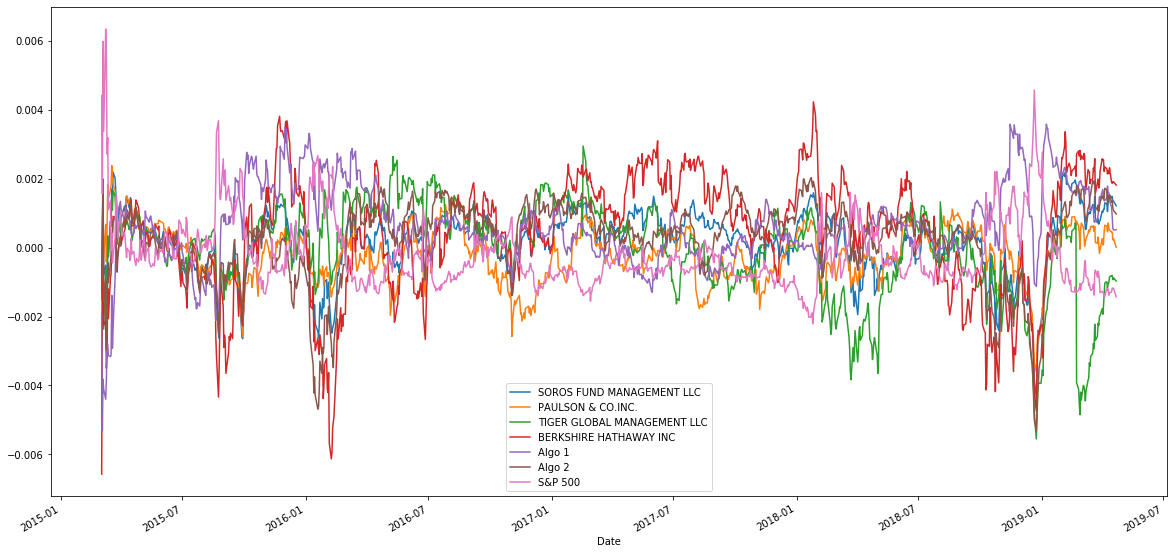

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_df.ewm(halflife = 21).mean().plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

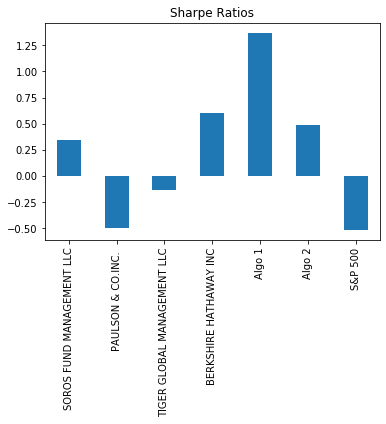

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
### <span style="color:red"> Yes based on the bar chart the algo trading companies get more return per amount of risk taken then the market and the whales with only algo 2 being beaten by Berkshire </span>

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE
GOOG_path = Path("../Resources - Google Sheets/GOOG.csv")
GOOG_df = pd.read_csv(GOOG_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
GOOG_df.index = GOOG_df.index.date #get rid of timestamp
GOOG_df.head()

,Close
2017-01-03,786.14
2017-01-04,786.90
2017-01-05,794.02
2017-01-06,806.15
2017-01-09,806.65


In [28]:
# Read the second stock
# YOUR CODE HERE
FB_path = Path("../Resources - Google Sheets/FB.csv")
FB_df = pd.read_csv(FB_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
FB_df.index = FB_df.index.date #get rid of timestamp
FB_df.head()

,Close
2017-01-03,116.86
2017-01-04,118.69
2017-01-05,120.67
2017-01-06,123.41
2017-01-09,124.90


In [29]:
# Read the third stock
# YOUR CODE HERE
AAPL_path = Path("../Resources - Google Sheets/AAPL.csv")
AAPL_df = pd.read_csv(AAPL_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
AAPL_df.index = AAPL_df.index.date #get rid of timestamp
AAPL_df.head()

,Close
2017-01-03,116.15
2017-01-04,116.02
2017-01-05,116.61
2017-01-06,117.91
2017-01-09,118.99


In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_combined_df = pd.concat([GOOG_df,FB_df,AAPL_df], axis="columns",join="inner")
my_combined_df.columns = ["GOOG", "FB", "AAPL"]
my_combined_df.head()

,GOOG,FB,AAPL
2017-01-03,786.14,116.86,116.15
2017-01-04,786.90,118.69,116.02
2017-01-05,794.02,120.67,116.61
2017-01-06,806.15,123.41,117.91
2017-01-09,806.65,124.90,118.99


In [31]:
# Reset the index
# YOUR CODE HERE

# Was not applicable to the format of data I got

In [32]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

# Was not applicable to the format of data I got

In [33]:
# Drop Nulls
# YOUR CODE HERE
my_combined_df = my_combined_df.dropna().copy()
my_combined_df.head()

,GOOG,FB,AAPL
2017-01-03,786.14,116.86,116.15
2017-01-04,786.90,118.69,116.02
2017-01-05,794.02,120.67,116.61
2017-01-06,806.15,123.41,117.91
2017-01-09,806.65,124.90,118.99


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
all_returns = my_combined_df.pct_change()
all_returns = all_returns.dropna().copy()
portfolio_returns =all_returns.dot(weights)
portfolio_returns.head()

2017-01-04    0.005169
2017-01-05    0.010272
2017-01-06    0.016377
2017-01-09    0.007284
2017-01-10   -0.001900
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
new_portfolio = pd.concat([combined_df, portfolio_returns], axis="columns",join="inner")
new_portfolio = new_portfolio.rename(columns={0: "My Portfolio"}) #since portfolio returns does not have a column header, giving it an understandable name
new_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.000771,0.005169
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.003505,0.010272
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003561,0.016377
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.000000,0.007284
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,-0.002822,-0.001900


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
new_portfolio = new_portfolio.dropna().copy()
new_portfolio.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
My Portfolio                   0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE
new_annualized_std = new_portfolio.std() * np.sqrt(252)
new_annualized_std

SOROS FUND MANAGEMENT LLC      0.124821
PAULSON & CO.INC.              0.107798
TIGER GLOBAL MANAGEMENT LLC    0.188752
BERKSHIRE HATHAWAY INC         0.198374
Algo 1                         0.106747
Algo 2                         0.120116
S&P 500                        0.129789
My Portfolio                   0.217976
dtype: float64

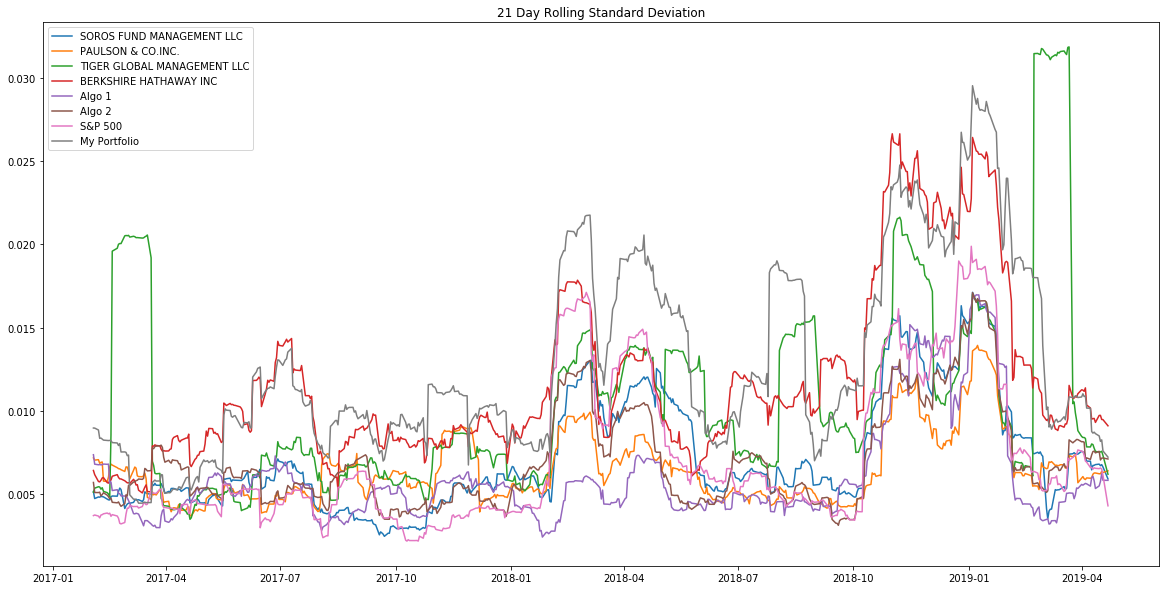

In [38]:
# Rolling
# YOUR CODE HERE
new_portfolio.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

In [39]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
new_sharpe_ratios = (new_portfolio.mean() * 252) / (new_portfolio.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.590634
PAULSON & CO.INC.             -0.419090
TIGER GLOBAL MANAGEMENT LLC   -0.904169
BERKSHIRE HATHAWAY INC         1.215596
Algo 1                         1.204568
Algo 2                         0.714065
S&P 500                       -0.797175
My Portfolio                   1.137091
dtype: float64

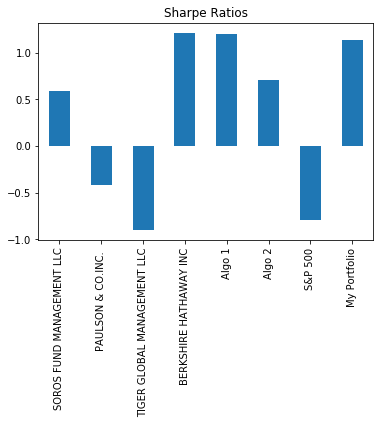

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
new_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### <span style="color:red"> My portfolio only gets beaten by Algo 1 and Berkshire and does beteer than the market so I believe that my portfolo holds up well when compared to the others. </span>

In [41]:
# Create a correlation analysis
# YOUR CODE HERE
new_correlation_matrix = new_portfolio.corr()
new_correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.685890,0.485357,0.760774,0.278541,0.796821,0.020061,0.655403
PAULSON & CO.INC.,0.685890,1.000000,0.419035,0.564935,0.284569,0.718742,-0.010575,0.510871
TIGER GLOBAL MANAGEMENT LLC,0.485357,0.419035,1.000000,0.344180,0.089557,0.429649,-0.020208,0.355713
BERKSHIRE HATHAWAY INC,0.760774,0.564935,0.344180,1.000000,0.239892,0.737123,-0.015891,0.788326
Algo 1,0.278541,0.284569,0.089557,0.239892,1.000000,0.295105,-0.052762,0.207847
Algo 2,0.796821,0.718742,0.429649,0.737123,0.295105,1.000000,-0.004471,0.648721
S&P 500,0.020061,-0.010575,-0.020208,-0.015891,-0.052762,-0.004471,1.000000,-0.013056
My Portfolio,0.655403,0.510871,0.355713,0.788326,0.207847,0.648721,-0.013056,1.000000


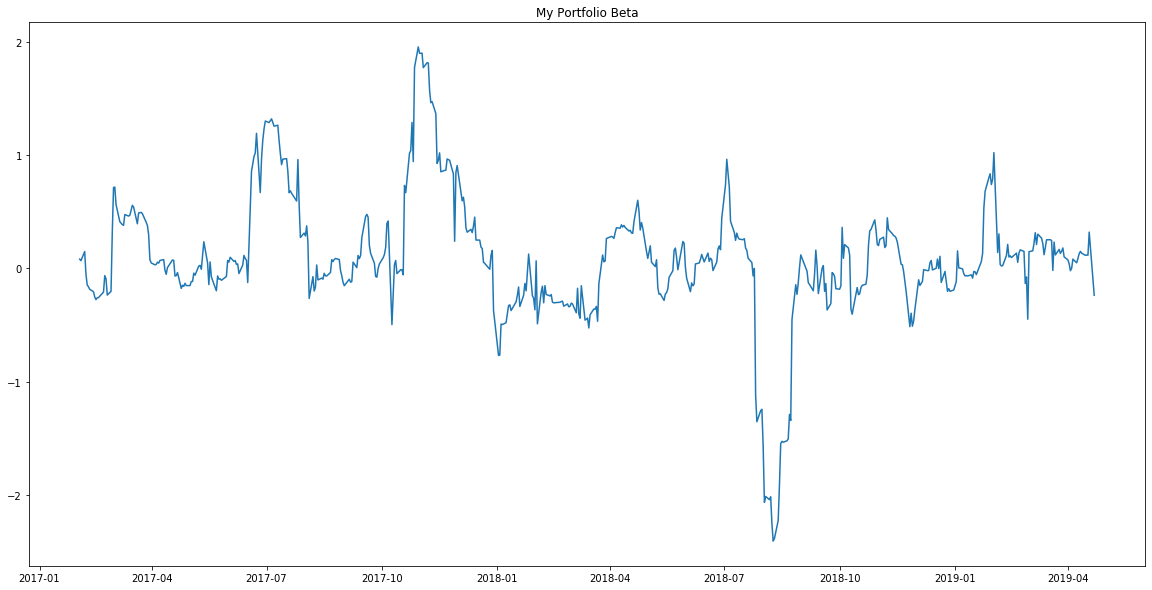

In [42]:
# Beta
# YOUR CODE HERE
new_covariance = new_portfolio['My Portfolio'].rolling(window=21).cov(new_portfolio['S&P 500'])
new_variance = new_portfolio['S&P 500'].rolling(window=21).var()
new_beta = new_covariance / new_variance
new_beta.plot(figsize=(20, 10), title='My Portfolio Beta')

### <span style="color:red"> my portfolio is a lot more volatile than the market but for the most part it is positivly correlated. </span>

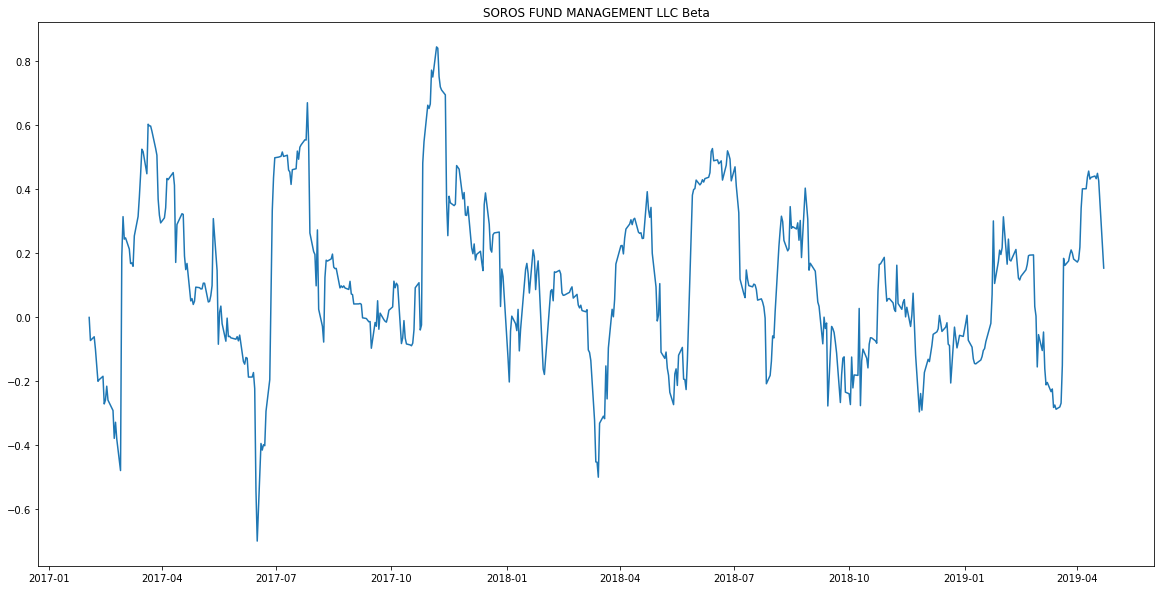

In [43]:
new_covariance = new_portfolio['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(new_portfolio['S&P 500'])
new_variance = new_portfolio['S&P 500'].rolling(window=21).var()
new_beta = new_covariance / new_variance
new_beta.plot(figsize=(20, 10), title='SOROS FUND MANAGEMENT LLC Beta')